# Практическая часть по математической статистике

В этом ноутбуке разберём примеры на Python по темам лекции:
1. Генеральная совокупность и выборка
2. Выборочные характеристики
3. Точечные оценки и их свойства
4. Распределения, связанные с нормальным: χ², t, F
5. Доверительные интервалы 

In [93]:
# Импорты и настройки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Для воспроизводимости
RANDOM_SEED = 28
np.random.seed(RANDOM_SEED)

## 🟣 1. Генеральная совокупность и выборка

### Демонстрация

Создадим "генеральную совокупность" — большую выборку из какого-нибудь распределения (например, нормального), а затем возьмём несколько выборок (samples) из неё.

In [94]:
# Генеральная совокупность
population_size = 20000
mu, sigma = 50, 8  # параметры нормального распределения
population = np.random.normal(loc=mu, scale=sigma, size=population_size)

print('population size:', population_size)
print('empirical mean:', population.mean(), 'empirical std:', population.std(ddof=0))

population size: 20000
empirical mean: 49.94843499852824 empirical std: 7.9954035875643


Возьмём несколько выборок размера n и посмотрим на их средние.

In [97]:
n = 30
k = 6  # число выборок
samples = [
    np.random.choice(population, size=n, replace=False) # выбираем n объектов без возвращения
    for _ in range(k)
]

sample_means = [s.mean() for s in samples]
sample_stds = [s.std(ddof=0) for s in samples]
for i, (m, s) in enumerate(zip(sample_means, sample_stds), 1):
    print(f'sample {i}: mean={m:.3f}, std(ddof=1)={s:.3f}')

sample 1: mean=51.318, std(ddof=1)=7.871
sample 2: mean=49.748, std(ddof=1)=9.242
sample 3: mean=49.589, std(ddof=1)=7.380
sample 4: mean=50.442, std(ddof=1)=8.976
sample 5: mean=49.751, std(ddof=1)=6.764
sample 6: mean=49.728, std(ddof=1)=7.601


In [79]:
len(samples), samples[0].shape

(6, (3000,))

In [80]:
# samples[0]

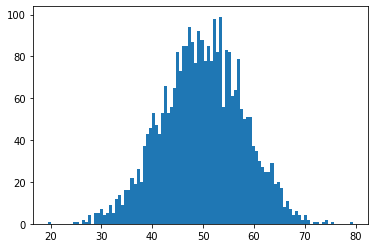

In [81]:
plt.hist(samples[0], bins=100)
plt.show()

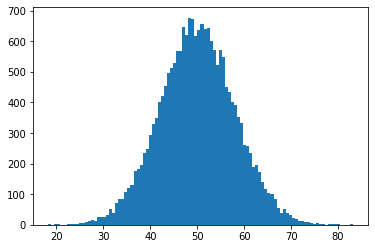

In [75]:
plt.hist(population, bins=100)
plt.show()

### Выборка VS генеральная совокупность

Когда мы говорим о **генеральной совокупности**, мы имеем в виду всё множество объектов или наблюдений, относительно которых хотим сделать вывод.  
**Выборка** — это лишь малая часть этой совокупности, на основании которой мы оцениваем параметры или проверяем гипотезы.

Чтобы наши выводы имели смысл, выборка должна быть **репрезентативной** — то есть отражать свойства всей генеральной совокупности.  
Репрезентативность означает, что:
- элементы выборки не должны быть систематически смещены (например, выбраны только по удобству);
- каждый элемент совокупности имеет равную вероятность попасть в выборку;
- объём выборки должен быть достаточным, чтобы случайные колебания не искажали картину.

Если выборка **не репрезентативна**, то даже самые точные методы статистического анализа не спасут — результаты будут говорить не о генеральной совокупности, а о специфике той группы, которую мы случайно (или не случайно) выбрали.  

Особенно важно это при **проверке гипотез**:  
если выборка не отражает генеральную совокупность, то статистические тесты могут давать ложные результаты — например, отклонять верную нулевую гипотезу или наоборот, не замечать настоящих различий.  

Поэтому первая проверка перед анализом — это вопрос:  
> “Действительно ли моя выборка репрезентативна для той ген. совокупности, о которой я хочу сделать вывод?”
**

## 🟣 2. Выборочные характеристики

### Основные виды

**1. Выборочное среднее (sample mean)**

Показывает **среднее значение** признака в выборке:
$$
\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i
$$
Интерпретация: если бы вы “усреднили” все наблюдения, получили бы типичное значение признака.

Используется как оценка математического ожидания $E[X]$ генеральной совокупности.


**2. Выборочная дисперсия (sample variance) - 2-й центральный момент**

Показывает, **насколько сильно значения разбросаны вокруг среднего**:
$$
s^2 = \frac{1}{n - 1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$
(делим на $n - 1$, чтобы исправить смещение оценки).

Большая дисперсия — значит, значения сильно колеблются; маленькая — наблюдения близки к среднему.


**3. Асимметрия (skewness)- нормированный 3-й центральный момент**

Характеризует **направление и степень "перекоса"** распределения:
$$
\text{skewness} = \frac{E[(X - \mu)^3]}{\sigma^3}
$$

* \> 0 — распределение с "длинным хвостом" вправо (правосторонняя асимметрия)
* < 0 — хвост влево
* = 0 — симметричное распределение (например, нормальное)

Пример: доходы населения обычно имеют **положительную асимметрию** (большинство получают средне, но есть редкие очень высокие значения).


**4. Эксцесс (kurtosis) - нормированный 4-й центральный момент**

Показывает, насколько **"островершинное" или "плосковершинное"** распределение:
$$
\text{kurtosis} = \frac{E[(X - \mu)^4]}{\sigma^4} - 3
$$
(минус 3 — чтобы нормальное распределение имело эксцесс = 0).

* \> 0 — “остроконечное” распределение (больше наблюдений близко к среднему и в хвостах)
* < 0 — “плосковершинное” распределение (равномернее)

Эксцесс помогает понять, **насколько сильно данные концентрируются** вокруг среднего и в хвостах.

PS: 1-й центральный момент всегда == 0.

**Общая формула центрального момента n-го порядка** (для выборки):

$$
\mu_n' = \frac{1}{N} \sum_{i=1}^{N} (X_i - \bar{X})^n
$$

где:

* $\mu_n'$ — n-й центральный момент,
* $X_i$ — отдельные наблюдения выборки (или элементы генеральной совокупности),
* $\bar{X} = \frac{1}{N} \sum_{i=1}^{N} X_i$ — среднее значение выборки (или математическое ожидание для генеральной совокупности),
* $N$ — размер выборки (или объём генеральной совокупности),
* $n = 1, 2, 3, \dots$ — порядок момента.


**Общая формула центрального момента n-го порядка** (для ген. совокупности):

$$
\mu_n' = \mathbb{E}\big[(X - \mathbb{E}[X])^n\big]
$$

* Здесь $\mathbb{E}[X]$ — истинное математическое ожидание.

In [87]:
samples[0].shape

(30,)

In [92]:
s = samples[0]
print('sample mean (math):', s.mean())
print('sample median (math):', np.median(s))
print('sample var (ddof=1):', s.var(ddof=1)) # выборочное
print('skewness:', stats.skew(s))
print('kurtosis (Fisher):', stats.kurtosis(s))

sample mean (math): 50.08189694269683
sample median (math): 50.90007544453576
sample var (ddof=1): 68.95067944397603
skewness: -0.7182680934904998
kurtosis (Fisher): 0.1286319975795327


In [89]:
np.sqrt(68.95067944397603)

8.303654583614135

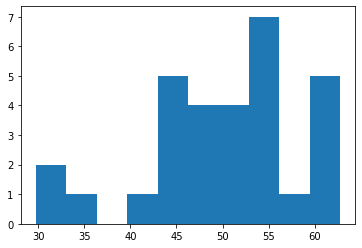

In [90]:
plt.hist(s)
plt.show()

### Смещение и разброс оценок

Когда мы оцениваем параметры генеральной совокупности (например, среднее или дисперсию) на основе выборки, важно понимать, **насколько точны и устойчивы эти оценки**.

**Смещение (bias)** показывает, **насколько среднее значение оценки отклоняется от истинного параметра**:
$$
\text{Bias}(\hat{\theta}) = E[\hat{\theta}] - \theta
$$
Если смещение равно нулю, оценка называется **несмещённой**.

Например, выборочное среднее — несмещённая оценка математического ожидания.

**Разброс (variance)** показывает, **насколько сильно оценки изменяются от выборки к выборке**:
$$
Var(\hat{\theta}) = E[(\hat{\theta} - E[\hat{\theta}])^2]
$$
Малый разброс означает, что оценка **стабильна**, большой — что она сильно зависит от конкретных данных.

В идеале мы хотим, чтобы оценка была **и несмещённой, и с малым разбросом**.
Однако между ними часто есть компромисс: иногда допускают небольшое смещение ради уменьшения разброса (bias–variance trade-off).


![](https://alexanderdyakonov.wordpress.com/wp-content/uploads/2018/04/bv_all.jpg?w=422&h=313)

In [ ]:
bias variance tradeoff

дилемма смещения и разброса

## 🟣 3. Точечные оценки и их свойства

### Свойства статистических оценок

Когда мы оцениваем параметры генеральной совокупности (например, среднее или дисперсию), важно понимать, **насколько "хороша" полученная оценка**.

**Основные свойства оценок:**

**1. Несмещённость**

Оценка называется *несмещённой*, если в среднем она совпадает с истинным значением параметра:
$$
E[\hat{\theta}] = \theta
$$
Пример: выборочное среднее — несмещённая оценка математического ожидания.

Выборочная дисперсия с делением на $(n-1)$ (а не на $n$) — несмещённая оценка дисперсии.

**2. Состоятельность**

Оценка называется *состоятельной*, если при увеличении объёма выборки она стремится к истинному значению параметра:
$$
\hat{\theta}_n \xrightarrow[n \to \infty]{P} \theta
$$
То есть, чем больше данных, тем ближе оценка к реальному параметру.

**3. Эффективность**

Среди всех несмещённых оценок эффективной считается та, у которой **наименьшая дисперсия**:
$$
Var(\hat{\theta}_{эфф}) \le Var(\hat{\theta})
$$
Например, выборочное среднее — эффективная оценка математического ожидания для нормального распределения.



In [95]:
def simulate_estimates(population, ns, trials=1000):
    """
    Проводит моделирование оценок среднего и дисперсии на выборках разного размера.
    
    Аргументы:
        population : np.ndarray
            Генеральная совокупность
        ns : list[int]
            Список размеров выборки
        trials : int
            Количество повторений для каждого размера выборки
    
    Возвращает:
        df : pd.DataFrame
            Таблица со средними и смещениями оценок
        means, vars_n1, vars_n : dict
            Результаты по каждому размеру выборки
    """
    true_mean = population.mean()
    true_var = population.var(ddof=0) # истинное
    
    res = []
    means, vars_n1, vars_n = {}, {}, {}

    for n in ns:
        m = np.empty(trials)
        v1 = np.empty(trials)
        v0 = np.empty(trials)

        # Генерируем много выборок и считаем оценки
        for i in range(trials):
            s = np.random.choice(population, size=n, replace=False)
            m[i] = s.mean()
            v1[i] = s.var(ddof=1)   # несмещённая дисперсия (делим на n-1)
            v0[i] = s.var(ddof=0)   # MLE-дисперсия (делим на n)

        means[n] = m
        vars_n1[n] = v1
        vars_n[n] = v0

        res.append({
            'n': n,
            'mean(mean_hat)': m.mean(),
            'sd(mean_hat)': m.std(ddof=1),
            'mean(S2_n-1)': v1.mean(),
            'bias(S2_n-1)': v1.mean() - true_var,
            'mean(S2_n)': v0.mean(),
            'bias(S2_n)': v0.mean() - true_var,
        })
    
    df = pd.DataFrame(res).set_index('n').round(4)
    return df, means, vars_n1, vars_n

In [96]:
# Запуск экспериментов моделирования
ns = [5, 10, 20, 50, 100, 200, 500]
trials = 1000

# Запуск моделирования
df, means, vars_n1, vars_n = simulate_estimates(
    population, ns, trials
)
df

,mean(mean_hat),sd(mean_hat),mean(S2_n-1),bias(S2_n-1),mean(S2_n),bias(S2_n)
n,,,,,,
5,49.9787,3.5122,65.6863,1.7598,52.5490,-11.3774
10,50.1586,2.5726,63.1223,-0.8042,56.8101,-7.1164
20,49.9368,1.7942,63.6835,-0.2430,60.4993,-3.4272
50,49.9198,1.1606,63.6916,-0.2349,62.4178,-1.5087
100,49.9498,0.7902,64.0859,0.1594,63.4450,-0.4814
200,49.9394,0.5529,64.0648,0.1383,63.7444,-0.1821
500,49.9554,0.3539,64.1028,0.1763,63.9746,0.0481


In [45]:
# Запуск экспериментов моделирования
ns = [5, 10, 20, 50, 100, 200, 500]
trials = 1000

# Запуск моделирования
df, means, vars_n1, vars_n = simulate_estimates(
    population, ns, trials
)
df

,mean(mean_hat),sd(mean_hat),mean(S2_n-1),bias(S2_n-1),mean(S2_n),bias(S2_n)
n,,,,,,
5,49.7205,3.4421,62.1126,-2.1716,49.6901,-14.5941
10,49.9900,2.4853,63.7194,-0.5648,57.3475,-6.9367
20,50.0137,1.7778,64.2944,0.0103,61.0797,-3.2045
50,50.0737,1.1525,63.8698,-0.4143,62.5924,-1.6917
100,50.0277,0.8016,64.3470,0.0628,63.7035,-0.5807
200,50.0618,0.5601,64.5211,0.2370,64.1985,-0.0857
500,50.0638,0.3539,64.2178,-0.0663,64.0894,-0.1948


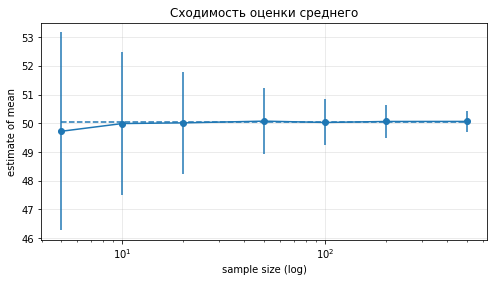

In [46]:
# 1. Сходимость оценки среднего
plt.figure(figsize=(8,4))
plt.errorbar(ns, [means[n].mean() for n in ns],
             yerr=[means[n].std(ddof=1) for n in ns],
             marker='o', linestyle='-')
plt.hlines(true_mean, min(ns), max(ns), linestyles='dashed')
plt.xscale('log')
plt.xlabel('sample size (log)')
plt.ylabel('estimate of mean')
plt.title('Сходимость оценки среднего')
plt.grid(alpha=0.3)
plt.show()

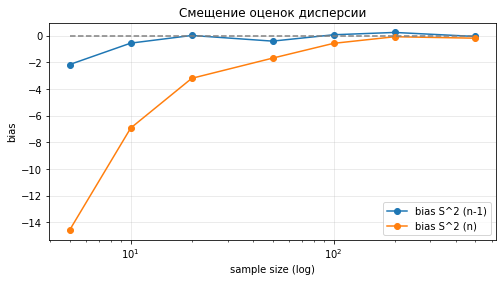

In [47]:
# 2. Смещение оценок дисперсии
plt.figure(figsize=(8,4))
plt.plot(ns, [vars_n1[n].mean() - true_var for n in ns], marker='o', label='bias S^2 (n-1)')
plt.plot(ns, [vars_n[n].mean() - true_var for n in ns], marker='o', label='bias S^2 (n)')
plt.hlines(0, min(ns), max(ns), linestyles='dashed', colors='gray')
plt.xscale('log')
plt.xlabel('sample size (log)')
plt.ylabel('bias')
plt.title('Смещение оценок дисперсии')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Метод моментов

**Идея:**
Используем **выборочные моменты**, чтобы оценить параметры распределения.

**Алгоритм**:

1. Пусть у нас есть распределение с **неизвестными параметрами** $\theta_1, \theta_2, \dots, \theta_k$.
2. Теоретические моменты этого распределения (мат. ожидание, дисперсия, третий и т.д.) выражаются через $\theta_i$:
   $$
   \mathbb{E}[X] = f_1(\theta_1, \dots, \theta_k), \quad
   \mathbb{E}[(X-\mathbb{E}[X])^2] = f_2(\theta_1, \dots, \theta_k), \dots
   $$
3. Вычисляем **выборочные моменты** $\bar{X}, m_2, m_3, \dots$ на основе данных.
4. Приравниваем выборочные моменты к теоретическим и решаем систему уравнений относительно $\theta_i$.

**Недостатки:** просто, не требует сложной оптимизации.

**Преимущества:** может быть неэффективно (оценки не всегда имеют минимальную дисперсию).


Применим метод моментов для оценки параметра экспоненциального распределения (λ) и для распределения Пуассона (λ).



In [102]:
# Метод моментов для экспоненциального распределения

# Генерируем выборку, истинное lambda = 2.5
exp_sample = np.random.exponential(scale=1/2.5, size=10)

# Метод моментов: E[X] = 1/lambda => lambda_hat = 1 / выборочное среднее
lambda_hat_mom = 1 / exp_sample.mean()
print('Экспоненциальное распределение, метод моментов: lambda_hat =', lambda_hat_mom)

Экспоненциальное распределение, метод моментов: lambda_hat = 4.024473748595205


In [104]:
# Метод моментов для распределения Пуассона

# Генерируем выборку, истинное lambda = 3.7
pois_sample = np.random.poisson(lam=3.7, size=1200)

# Метод моментов: E[X] = lambda => lambda_hat = выборочное среднее
lambda_hat_pois = pois_sample.mean()
print('Распределение Пуассона, метод моментов: lambda_hat =', lambda_hat_pois)

Распределение Пуассона, метод моментов: lambda_hat = 3.68


### Метод максимального правдоподобия (Maximum Likelihood, MLE)

**Идея:**
Ищем такие параметры, при которых **наблюдаемые данные максимально вероятны**.

**Алгоритм:**

1. Пусть есть данные $X_1, \dots, X_n$ и **функция плотности/массы вероятности** $f(X|\theta)$.
2. **Функция правдоподобия**:
   $$
   L(\theta) = \prod_{i=1}^n f(X_i|\theta)
   $$
3. Берём логарифм (для удобства):
   $$
   \ell(\theta) = \log L(\theta) = \sum_{i=1}^n \log f(X_i|\theta)
   $$
4. Ищем (\hat{\theta}), при котором (\ell(\theta)) максимальна:
   $$
   \hat{\theta}*{MLE} = \arg\max*\theta \ell(\theta)
   $$

**Преимущества:** часто даёт более точные оценки (с минимальной дисперсией при больших n).
**Недостатки:** требует оптимизации, иногда нет аналитического решения.

Рассмотрим примеры MLE:
- Нормальное распределение: оценки для μ и σ²
- Экспоненциальное распределение: оценка λ
- Бернулли: оценка p

In [107]:
# Нормальное распределение (MLE)
x = np.random.normal(loc=5.0, scale=2.0, size=15000)  # генерируем выборку, mu=5, sigma=2
mu_mle = x.mean()  # MLE для mu: выборочное среднее
sigma2_mle = ((x - mu_mle)**2).sum() / len(x)  # MLE для sigma^2: делим на n
print('Normal MLE: mu=', mu_mle, 'sigma^2 MLE=', sigma2_mle)

Normal MLE: mu= 4.992991610895289 sigma^2 MLE= 3.9625056599119484


In [108]:
# Экспоненциальное распределение (MLE)
exp_s = np.random.exponential(scale=1/1.7, size=80)  # истинное lambda=1.7
lambda_hat_exp = 1 / exp_s.mean()  # MLE для lambda = 1 / выборочное среднее
print('Exponential MLE lambda_hat =', lambda_hat_exp)

Exponential MLE lambda_hat = 1.8646377215839245


In [109]:
# Бернулли (MLE)
ber = np.random.binomial(n=1, p=0.3, size=100)  # генерируем 0/1 с p=0.3
p_hat = ber.mean()  # MLE для p = выборочное среднее
print('Bernoulli MLE p_hat =', p_hat)

Bernoulli MLE p_hat = 0.26


## 🟣 4. Распределения, связанные с нормальным: χ², t, F

Многие статистические методы основаны на предположении о **нормальности данных**. В связи с этим появились производные распределения, которые используются для проверки гипотез, построения доверительных интервалов и анализа дисперсий.


### Распределение χ² (хи-квадрат)

* **Определение:**
  Если $Z_1, Z_2, \dots, Z_k \sim N(0,1)$ — независимые стандартные нормальные случайные величины, то сумма их квадратов
  $$
  \chi^2 = \sum_{i=1}^{k} Z_i^2
  $$
  имеет **распределение хи-квадрат с k степенями свободы**.

* **Используется для:**

  1. Проверки дисперсии генеральной совокупности.
  2. Тестов согласия (goodness-of-fit).
  3. Таблиц сопряжённости (тест независимости).

* **Форма распределения:**

  * Насыщенная справа, положительная.
  * Математическое ожидание $E[\chi^2] = k$, дисперсия $Var(\chi^2) = 2k$.


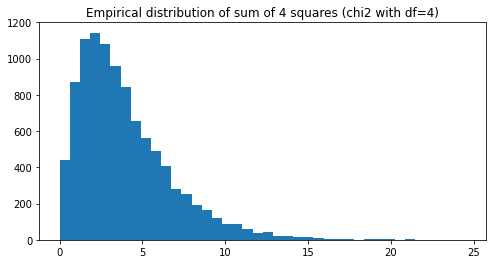

In [55]:
# Chi-square demonstration: sum of squares of standard normals
zs = np.random.normal(size=(10000, 4))
chis = (zs**2).sum(axis=1)
plt.figure(figsize=(8,4))
plt.hist(chis, bins=40)
plt.title('Empirical distribution of sum of 4 squares (chi2 with df=4)')
plt.show()

### Распределение Стьюдента t

* **Определение:**
  Если $X \sim N(\mu, \sigma^2)$ и $\bar{X}$ — выборочное среднее по n наблюдениям, а $S^2$ — выборочная дисперсия, то
  $$
  t = \frac{\bar{X} - \mu}{S / \sqrt{n}} \sim t_{n-1}
  $$
  имеет **распределение t Стьюдента с n-1 степенями свободы**.

* **Используется для:**

  1. Проверки гипотез о средних при неизвестной дисперсии.
  2. Построения доверительных интервалов для среднего.

* **Особенности:**

  * Чем больше n, тем ближе t к стандартному нормальному распределению.

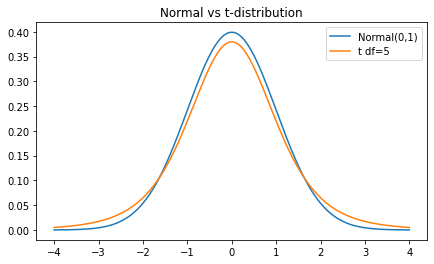

In [112]:
# Демонстрация t-распределения и нормального
x = np.linspace(-4, 4, 2000)
plt.figure(figsize=(7,4))
plt.plot(x, stats.norm.pdf(x), label='Normal(0,1)')
plt.plot(x, stats.t.pdf(x, df=5), label='t df=5')
plt.legend()
plt.title('Normal vs t-distribution')
plt.show()

### Распределение Фишера F

* **Определение:**
  Если
  $$
  U_1 \sim \chi^2_{d_1}, \quad U_2 \sim \chi^2_{d_2} \quad \text{независимы,}
  $$
  то случайная величина
  $$
  F = \frac{(U_1/d_1)}{(U_2/d_2)}
  $$
  имеет **распределение Фишера с ($d_1,d_2$) степенями свободы**.

* **Используется для:**

  1. Сравнения дисперсий двух нормальных выборок (тест Фишера).
  2. Однофакторного дисперсионного анализа (ANOVA).

* **Особенности:**

  * Положительная случайная величина.
  * Скошенная вправо, чем меньше степеней свободы, тем сильнее асимметрия.


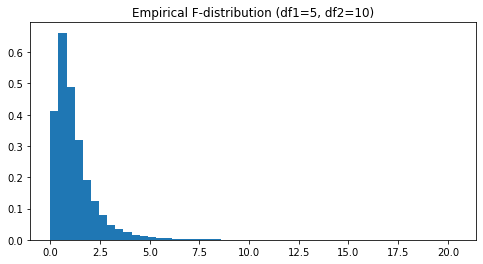

In [113]:
# Fisher demo
d1, d2 = 5, 10
chi1 = np.random.chisquare(df=d1, size=10000)
chi2 = np.random.chisquare(df=d2, size=10000)
f_vals = (chi1/d1) / (chi2/d2)

plt.figure(figsize=(8,4))
plt.hist(f_vals, bins=50, density=True)
plt.title(f'Empirical F-distribution (df1={d1}, df2={d2})')
plt.show()

## 🟣 5. Доверительные интервалы 

**Доверительный интервал (ДИ)** — это **интервал, построенный на основе выборки**, который с заданной вероятностью содержит истинное значение параметра генеральной совокупности.

* Параметр может быть **математическим ожиданием**, **дисперсией**, **долей успехов** и т.д.
* Вероятность, с которой интервал содержит истинное значение, называется **уровнем доверия** $1-\alpha$, обычно 95% или 99%.

**Интерпретация:**

> «Если мы многократно будем брать выборки и строить доверительные интервалы, то примерно $1-\alpha$ доля таких интервалов будет содержать истинное значение параметра».

### ДИ для среднего при известной дисперсии (нормальное распределение)

Пусть $X_1, \dots, X_n \sim N(\mu, \sigma^2)$ и $\sigma$ известно. Тогда доверительный интервал для $\mu$ строится как:

$$
\bar{X} \pm z_{\alpha/2} \frac{\sigma}{\sqrt{n}}
$$

где:

* $\bar{X}$ — выборочное среднее,
* $z_{\alpha/2}$ — квантиль стандартного нормального распределения,
* $n$ — размер выборки.

### ДИ для среднего при неизвестной дисперсии

Если $\sigma$ неизвестна, используем **t-распределение Стьюдента**:

$$
\bar{X} \pm t_{n-1, \alpha/2} \frac{S}{\sqrt{n}}
$$

где:

* $S^2 = \frac{1}{n-1} \sum (X_i - \bar{X})^2$ — выборочная дисперсия,
* $t_{n-1, \alpha/2}$ — квантиль t-распределения с $n-1$ степенями свободы.


### Зачем нужны доверительные интервалы

1. **Оценка неопределённости параметра.** ДИ показывает **границы, в которых с высокой вероятностью находится параметр**.
2. **Сравнение групп.** Можно оценивать, различаются ли средние или доли между выборками.
3. **Принятие решений.** Интервал позволяет учитывать вариабельность данных и избегать чрезмерной уверенности в точечной оценке.

In [57]:
# Две независимые выборки
x1 = np.random.normal(5.2, 1.9, size=30)  # выборка 1
x2 = np.random.normal(4.6, 1.9, size=28)  # выборка 2

n1, n2 = len(x1), len(x2)  # размеры выборок
s1, s2 = x1.var(ddof=1), x2.var(ddof=1)  # выборочные дисперсии

In [114]:
# Общая дисперсия при предположении равных дисперсий
sp2 = ((n1-1)*s1 + (n2-1)*s2) / (n1+n2-2)

# Стандартная ошибка разности средних
se_diff = np.sqrt(sp2*(1/n1 + 1/n2))

# Степени свободы для t-распределения
df = n1 + n2 - 2

# Критическое значение t для 95% доверительного интервала
t_crit = stats.t.ppf(1-0.025, df=df)

# Разница выборочных средних
diff = x1.mean() - x2.mean()

# Доверительный интервал для разницы средних
ci_lower = diff - t_crit*se_diff
ci_upper = diff + t_crit*se_diff

print('95% CI for difference of means (equal variances): [{:.3f}, {:.3f}]'.format(ci_lower, ci_upper))

95% CI for difference of means (equal variances): [-0.809, 1.088]
